In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [22]:
path = r"C:\Users\suhas\Documents\careerfoundry\ml\datasets\weather-processed.csv"
df = pd.read_csv(path)
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [23]:
# Choose the year 2008
df_2008 = df[df['DATE'].astype(str).str.contains('2008')] 
df_2008.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
17532,20080101,1,8,1.6,0.86,1.0257,0.22,0.00,0,0.0,...,8,0.82,1.0122,0.21,0.26,0,0.1,11.0,10.8,11.2
17533,20080102,1,8,4.6,0.67,1.0181,0.25,0.00,0,0.0,...,7,0.79,1.0010,0.24,0.17,0,0.0,8.5,8.1,9.0
17534,20080103,1,7,3.1,0.68,1.0076,0.28,0.00,0,0.1,...,5,0.73,0.9978,0.27,0.82,0,1.6,6.8,5.5,6.1
17535,20080104,1,8,1.6,0.80,1.0131,0.14,0.00,0,0.0,...,5,0.81,0.9918,0.14,1.94,0,0.3,3.5,-2.9,10.0
17536,20080105,1,8,4.1,0.74,1.0126,0.18,1.14,0,0.0,...,5,0.65,0.9987,0.23,0.10,0,1.3,7.0,5.6,9.2


In [24]:
# removing all columns with global radiation, precipitation and pressure due to some stations lacking said data

filtered_columns = [
    col for col in df_2008.columns
    if all(x not in col for x in ['global_radiation', 'precipitation', 'pressure'])
]
df_2008 = df_2008[filtered_columns]

In [25]:
# running PCA with n = 9
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(df_2008)

In [26]:
# Make a dataframe and export
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9'])
dfPCA.to_csv(r"C:\Users\suhas\Documents\careerfoundry\ml\datasets\weather-PCA.csv", index=False)

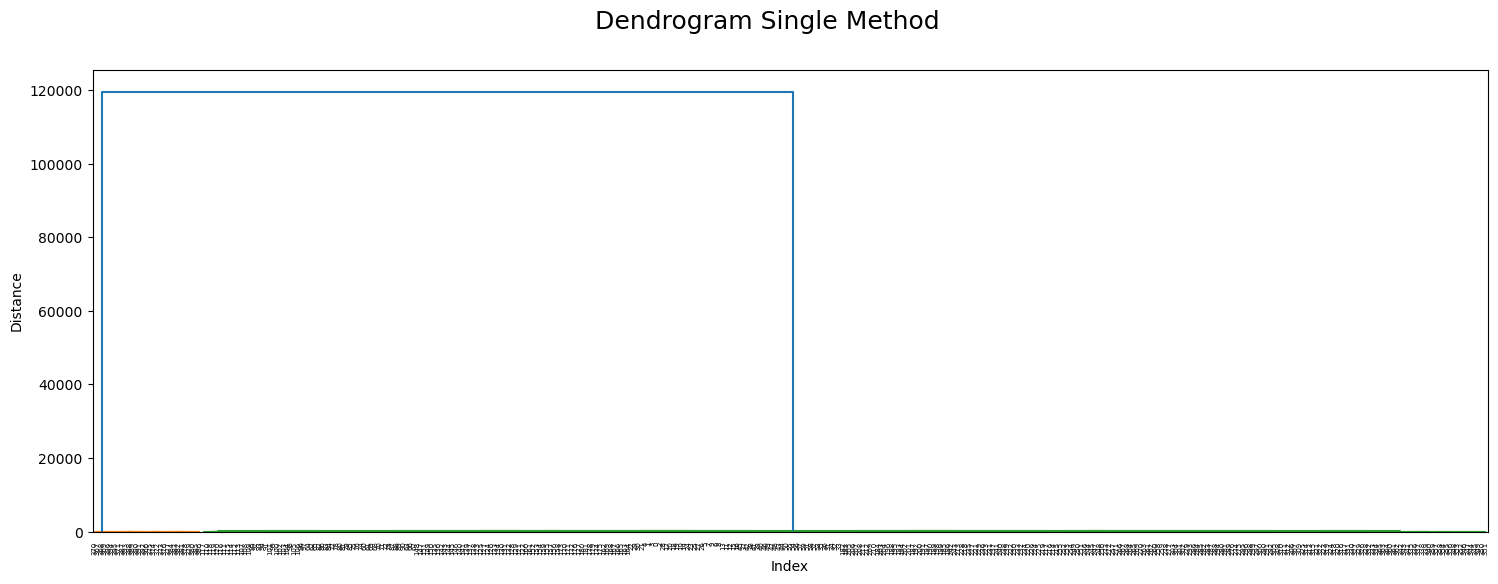

In [27]:
distance_single = linkage(dfPCA.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

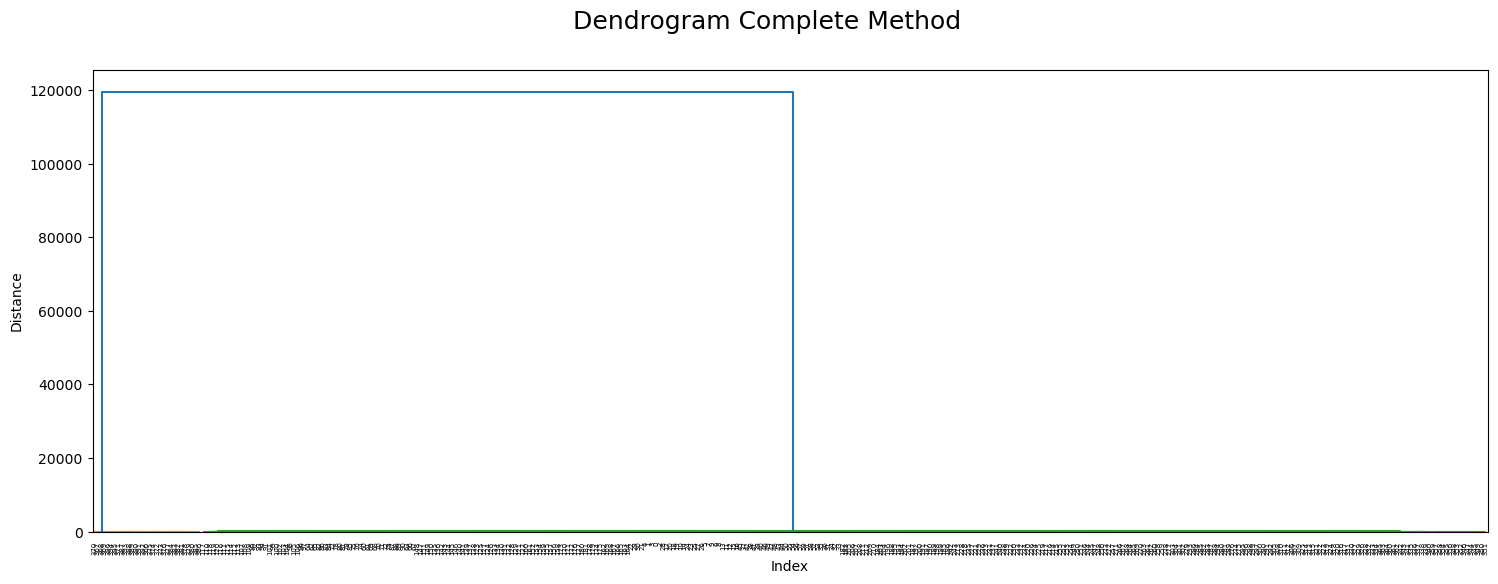

In [28]:
distance_complete = linkage(dfPCA.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

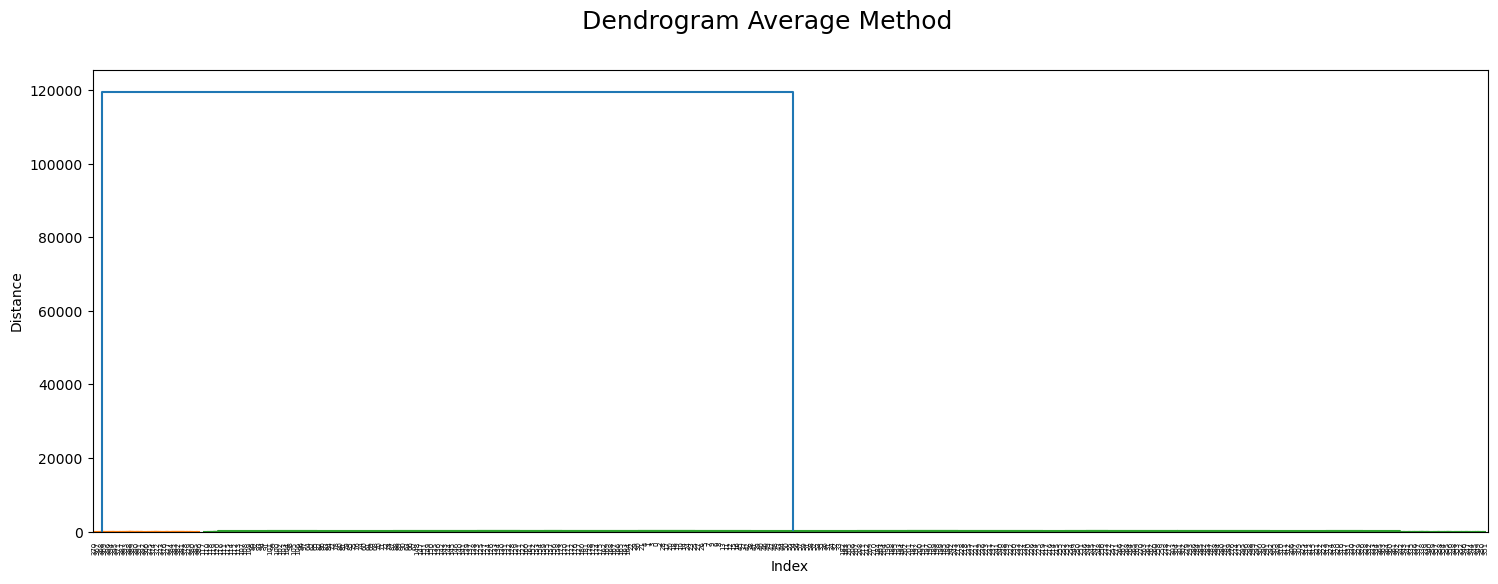

In [29]:
distance_average = linkage(dfPCA.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

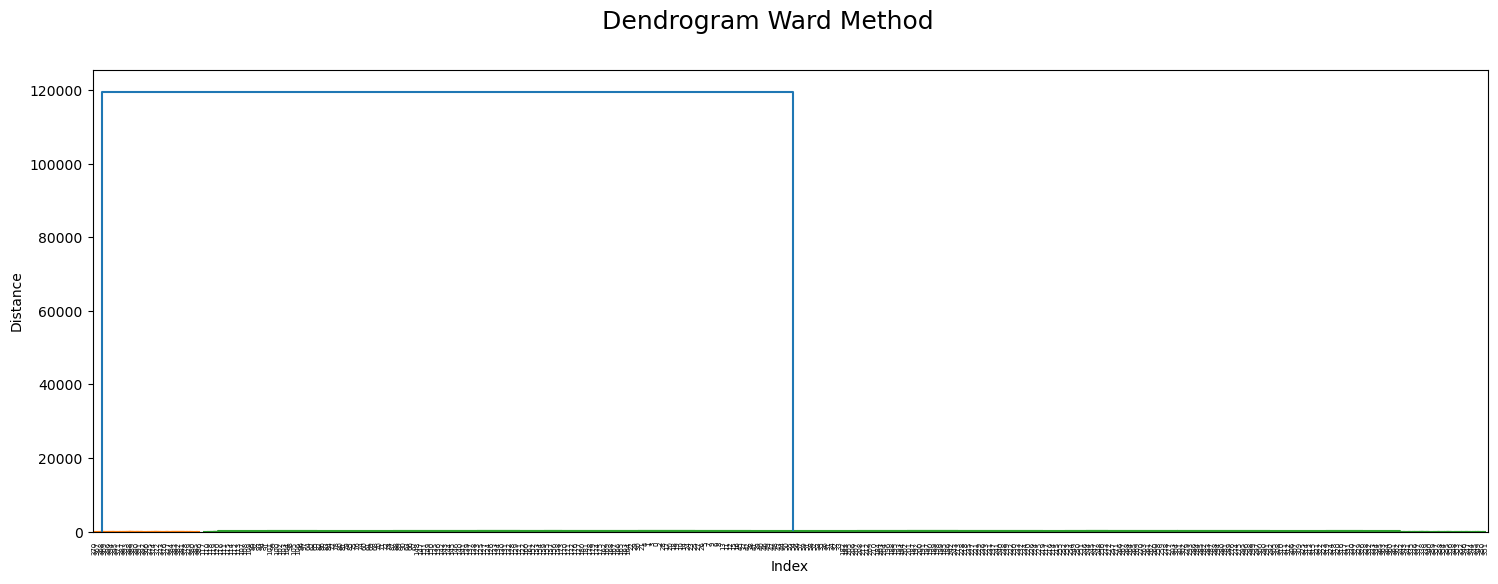

In [30]:
distance_ward = linkage(dfPCA.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()